In [78]:
import sys
import warnings
warnings.simplefilter("ignore")

# LIBRERIAS

In [79]:
## Librerías a usar
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import norm

# DATOS

In [80]:
## Cargar la red
base=pd.read_excel("./Base-inicial.xlsx")
base

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN,"IDG Capital, Prosus & Naspers, Lippo Group, PCCW"
1,Warburg Pincus,"New York, New York, United States",Active,NaN,433.0,286.0,22.0,131.0,NaN,NaN,...,USD,3.802820e+07,NaN,34.635,"34,033.67",392.0,53801.0,USD,53801.0,NaN
2,Twitter,"San Francisco, California, United States",Active,For Profit,10.0,2.0,1.0,3.0,9.0,37.0,...,USD,4.430192e+09,77.0,"6,026,399,205","3,104,998,131.33",942.0,NaN,NaN,NaN,"Andreessen Horowitz, Morgan Stanley, Spark Cap..."
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.0,NaN,NaN,1.0,1.0,4.0,...,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.0,NaN,NaN,NaN,"Tencent, JP Morgan Chase, Ontario Teachers' Pe..."
4,WeWork,"New York, New York, United States",Active,For Profit,9.0,6.0,4.0,2.0,11.0,24.0,...,USD,2.159578e+10,120.0,"2,646,155","2,483,475.83",280.0,343977.0,USD,343977.0,"SoftBank, JP Morgan Chase, Goldman Sachs, Insi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,Activation Capital,NaN,Active,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2207,Gavi,"Moritzburg, Sachsen, Germany",Active,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4070569.0,USD,4070569.0,NaN
2208,BF Holdings,"Dudley, Dudley, United Kingdom",Closed,For Profit,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,GO Virginia,NaN,Active,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.495,NaN,0.0,NaN,NaN,NaN,NaN


In [81]:
base.dtypes

Organization Name                                       object
Headquarters Location                                   object
Operating Status                                        object
Company Type                                            object
Number of Investments                                  float64
Number of Lead Investments                             float64
Number of Diversity Investments                        float64
Number of Exits                                        float64
Number of Lead Investors                               float64
Number of Investors                                    float64
Industry Groups                                         object
Industries                                              object
Number of Funding Rounds                               float64
Funding Status                                          object
Last Funding Date                               datetime64[ns]
Last Funding Amount                                    

# CREACIÓN DE NODOS Y ARCOS

In [82]:
# Crear los nodos
nodos = base.dropna(subset=['Organization Name', 'Principales inversionistas'])
nodos

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.00,NaN,NaN,NaN,"IDG Capital, Prosus & Naspers, Lippo Group, PCCW"
2,Twitter,"San Francisco, California, United States",Active,For Profit,10.0,2.0,1.0,3.0,9.0,37.0,...,USD,4.430192e+09,77.0,"6,026,399,205","3,104,998,131.33",942.00,NaN,NaN,NaN,"Andreessen Horowitz, Morgan Stanley, Spark Cap..."
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.0,NaN,NaN,1.0,1.0,4.0,...,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.00,NaN,NaN,NaN,"Tencent, JP Morgan Chase, Ontario Teachers' Pe..."
4,WeWork,"New York, New York, United States",Active,For Profit,9.0,6.0,4.0,2.0,11.0,24.0,...,USD,2.159578e+10,120.0,"2,646,155","2,483,475.83",280.00,343977.0,USD,343977.0,"SoftBank, JP Morgan Chase, Goldman Sachs, Insi..."
5,Wagestream,"London, England, United Kingdom",Active,For Profit,1.0,NaN,NaN,NaN,6.0,15.0,...,USD,2.543234e+08,NaN,33.731,"19,865.67",122.00,NaN,NaN,NaN,"Smash Capital, Ascension, BlackRock, QED Inves..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,Baidu,"Beijing, Beijing, China",Active,For Profit,113.0,62.0,3.0,27.0,5.0,10.0,...,USD,2.620000e+07,37.0,"165,824,170","135,372,669.33",976.00,NaN,NaN,NaN,"Google, IDG Capital, Threshold, ePlanet Capita..."
2114,Backstage Capital,"West Hollywood, California, United States",Active,NaN,143.0,24.0,114.0,3.0,NaN,1.0,...,NaN,NaN,1.0,13.025,18.055,546.00,NaN,NaN,NaN,Josef Scarantino
2143,Boost VC,"San Mateo, California, United States",Active,NaN,266.0,25.0,38.0,29.0,NaN,1.0,...,NaN,NaN,3.0,734,"2,610.83",53.00,NaN,NaN,NaN,Mason Ng
2147,ESL Gaming,"Cologne, Nordrhein-Westfalen, Germany",Active,For Profit,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Omnes Capital


In [83]:
nodos[nodos['Organization Name']=='Mason Ng']

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas


In [84]:
# Crear los arcos para estos nuevos individuos
sources = [] # lista de origenes
target = [] # lista de destinos

for i in nodos.index:
    texto = nodos["Principales inversionistas"][i]
    conexiones = texto.split(',')
    for j in range(len(conexiones)):
        # Agregar el origen
        target.append(nodos["Organization Name"][i])
        # Agregar el destino
        sources.append(conexiones[j])

In [85]:
# Crear el archivo de arcos

tuplas=list(zip(sources, target))

# Crear un Data Frame a partir de las tuplas
arcos = pd.DataFrame( tuplas, columns =['Source', 'Target'])
arcos

,Source,Target
0,IDG Capital,Tencent
1,Prosus & Naspers,Tencent
2,Lippo Group,Tencent
3,PCCW,Tencent
4,Andreessen Horowitz,Twitter
...,...,...
5071,TA Associates,Bigpoint
5072,Summit Partners,Bigpoint
5073,GMT Capital,Bigpoint
5074,Peacock Equity,Bigpoint


In [86]:
nodos2 = nodos[nodos['Organization Name'].isin(arcos.Source)].drop('Principales inversionistas',axis=1)
nodos2

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.000,375.0,15.0,125.0,1.0,4.0,...,1.257677e+10,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.000,NaN,NaN,1.0,1.0,4.0,...,7.706506e+08,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.0,NaN,NaN,NaN
7,Techstars,"Boulder, Colorado, United States",Active,For Profit,3.569,491.0,795.0,363.0,1.0,11.0,...,1.088000e+08,USD,1.088000e+08,318.0,606.778,"240,410.17",275.0,26964318.0,USD,26964318.0
12,Zomato,"Gurgaon, Haryana, India",Active,For Profit,15.000,13.0,NaN,2.0,12.0,25.0,...,2.100568e+09,USD,2.100568e+09,NaN,"28,528,270","22,805,302",494.0,NaN,NaN,NaN
15,SAP,"Walldorf, Baden-Wurttemberg, Germany",Active,For Profit,29.000,7.0,NaN,14.0,1.0,2.0,...,1.301371e+09,USD,1.301371e+09,239.0,"27,548,849","26,208,156.17",544.0,67473085.0,USD,67473085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Earlybird Venture Capital,"Berlin, Berlin, Germany",Active,For Profit,281.000,112.0,3.0,44.0,1.0,1.0,...,1.800000e+07,EUR,2.098876e+07,11.0,7.637,"12,045.33",153.0,13241876.0,USD,13241876.0
1966,EquityZen,"New York, New York, United States",Active,For Profit,37.000,2.0,4.0,31.0,1.0,16.0,...,1.130937e+07,USD,1.130937e+07,2.0,373.848,"506,332.33",713.0,246443.0,USD,246443.0
2015,Golub Capital,"San Francisco, California, United States",Active,NaN,31.000,12.0,3.0,14.0,NaN,1.0,...,NaN,NaN,NaN,NaN,15.95,"10,751.5",510.0,NaN,NaN,NaN
2075,ArcTern Ventures,"Toronto, Ontario, Canada",Active,NaN,41.000,13.0,3.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,3.28,NaN,10.0,NaN,NaN,NaN


In [87]:
arcos2 = arcos[arcos.Source.isin(nodos2['Organization Name'])]
arcos2

,Source,Target
9,Tencent,Ubisoft
13,SoftBank,WeWork
41,Galaxy Digital,Terra
46,Digital Currency Group,Wyre
51,Apple,Zomato
...,...,...
5030,Tencent,DST Global
5043,500 Startups,Golden Gate
5050,Google,AOL
5061,BC Partners,Altice USA


In [88]:
nodos2 = nodos2.set_index('Organization Name')

In [89]:
# Construir red
G=nx.DiGraph()
# Nodos
# Agregar los nodos por su identificador
G.add_nodes_from(nodos2.index)
# Agregar los atributos de los nodos
# Primero recorrer los nodos que se agregaron a la red
for nodo in G.nodes:
    # En cada nodo recorremos los atributos de los nodos
    for atr in nodos2:
        # Agregar cada atributo al nodo
        G.nodes[nodo][atr]=nodos2[atr][nodo]
# Arcos
# Agregar los arcos
G.add_edges_from([tuple(x) for x in arcos2[['Source','Target']].to_numpy()])

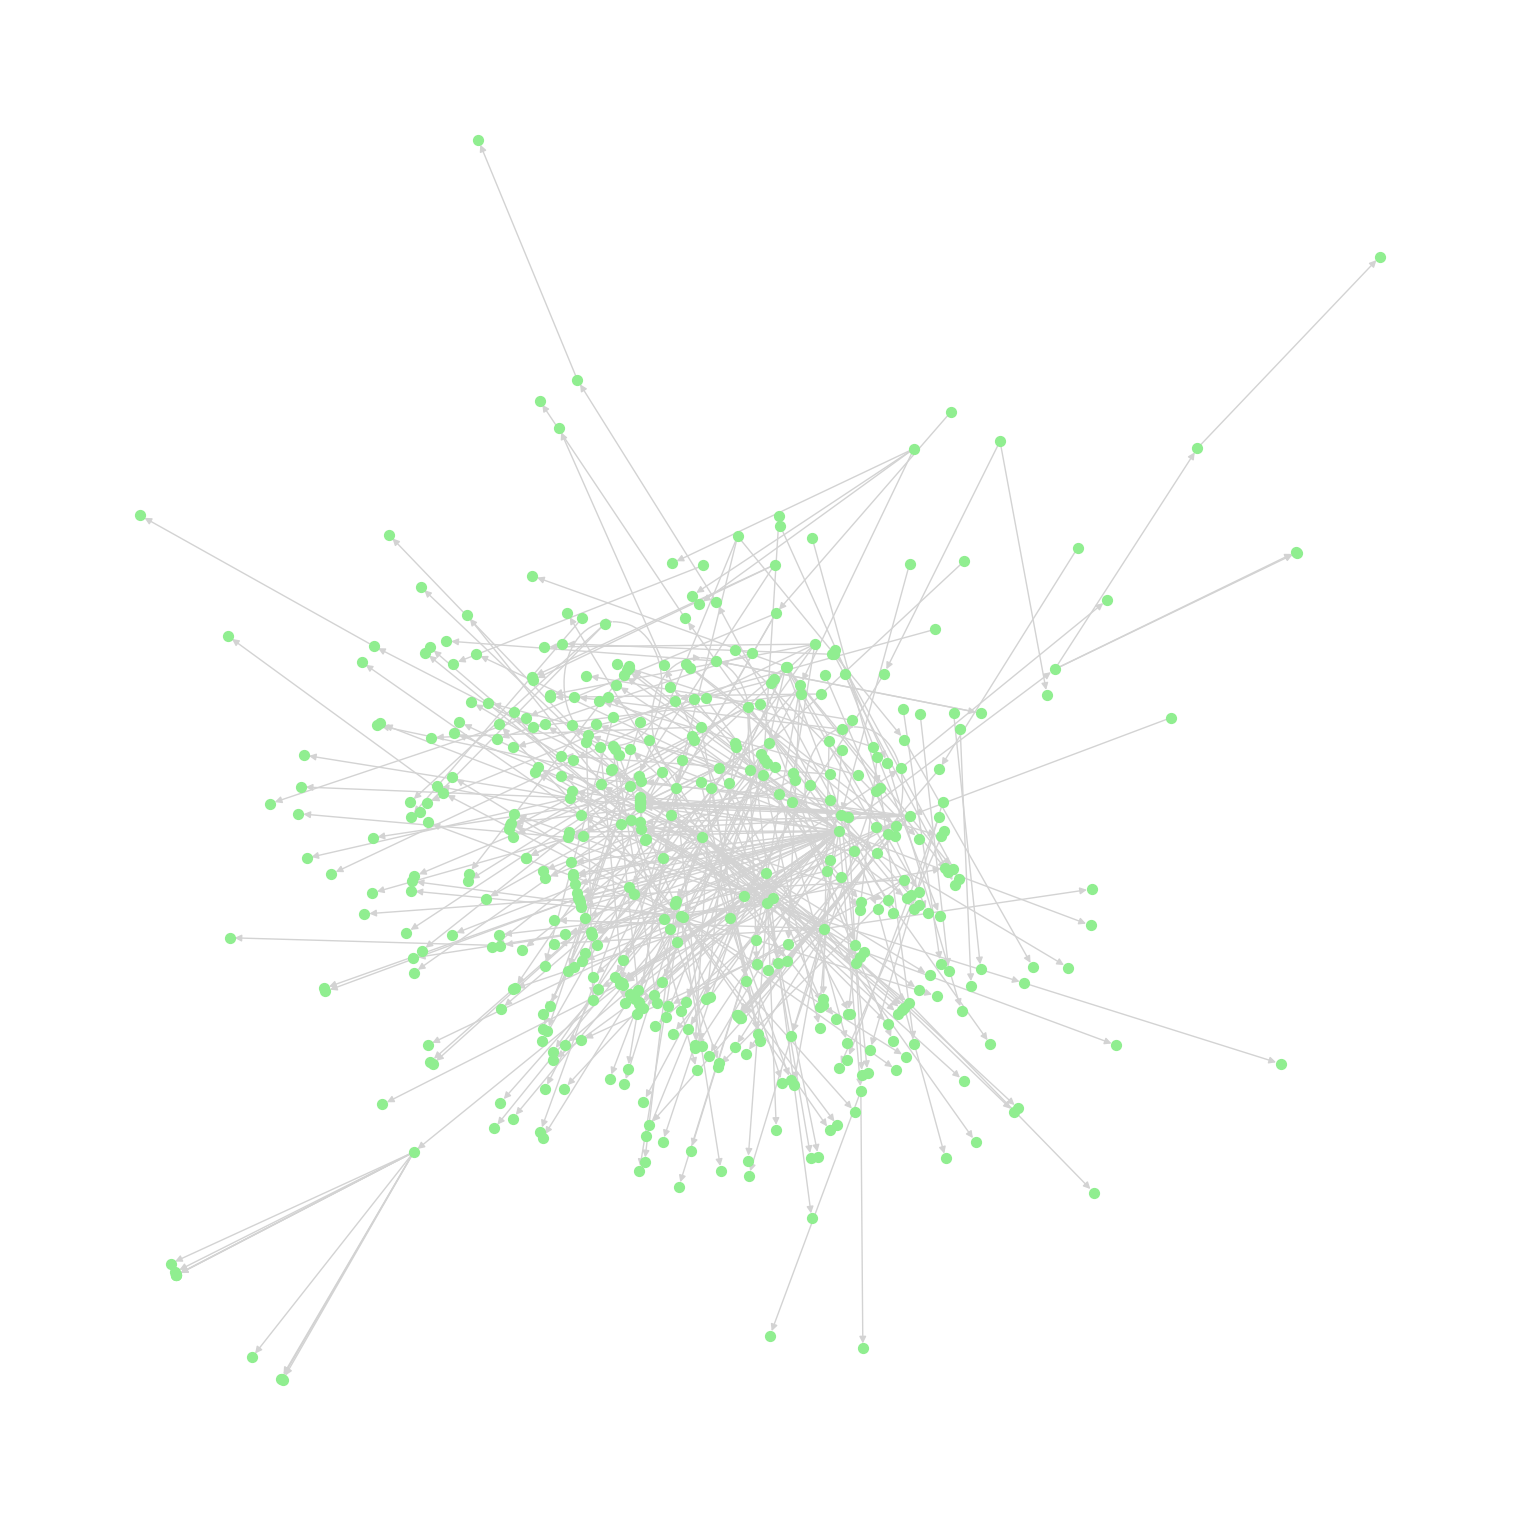

In [90]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))
# Después se genera el gráfico
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')
# Por último se muestra la gráfica
plt.show()

# Detección de comunidades

A continuación realizaremos un análisis con algoritmos de detección de comunidades teniendo en cuenta los atributos disponibles de los nodos

In [91]:
#pip install infomap

In [92]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import community
import random
import infomap

In [93]:
from community import community_louvain as community
from networkx.algorithms.community import label_propagation_communities

In [106]:
def comunidades(G,opcion):
    if opcion == 1:
        R = nx.to_undirected(G)
        louvain = community.best_partition(R,random_state=10)
        for nodo in R.nodes:
            R.nodes[nodo]['Comunidad']=louvain.get(nodo)
    if opcion == 2:
        R = nx.to_undirected(G)
        overlaping = nx.algorithms.community.girvan_newman(R)
        lista = list(tuple(sorted(c) for c in next(overlaping)))
        nodos = list(R.nodes())
        values = [0]*len(nodos)
        #values
        k=0
        for i in nodos:
            for j in range(0,len(lista)):
                if(i in lista[j]):
                    values[k] = j+1
            k+=1
        i=0
        for nodo in R.nodes:
            # Agregamos la comunidad en cada nodo
            R.nodes[nodo]['Comunidad']=values[i]
            i+=1
    if opcion == 3:
        R=G
        im = infomap.Infomap("--two-level --directed")
        # Agrego arcos
        for e in R.edges():
            im.addLink(*e)
        # Ejecutar
        im.run()
        # Obtengo el diccionario con las comunidades
        infoMap = im.get_modules()
        info={}
        for node in im.tree:
            if node.is_leaf:
                info[node.node_id]=node.module_id
        for nodo in R.nodes:
            R.nodes[nodo]['Comunidad']=infoMap.get(nodo)
            
    if opcion==4:
        # Transformar de red dirigida a no dirigida (print(G.is_directed()))
        R= nx.to_undirected(G)
        # Correr el algoritmo
        partition1 = label_propagation_communities(R)
        
        partition3={}
        nom_comunidad=0

        for comunidad in partition1:
            for nodo in comunidad:
                partition3[nodo]=nom_comunidad
            nom_comunidad=nom_comunidad+1
        for nodo in R.nodes:
            R.nodes[nodo]['Comunidad']=partition3.get(nodo)
            

    if opcion==5:
            # Transformar de red dirigida a no dirigida (print(G.is_directed()))
            R=nx.to_undirected(G)
            # Correr el algoritmo
            partition = nx.algorithms.community.greedy_modularity_communities(R)
            diccionario={}
            nom_comunidad=0
            for comunidad in partition:
                for nodo in comunidad:
                    diccionario[nodo]=nom_comunidad
                nom_comunidad=nom_comunidad+1
            for nodo in R.nodes:
                R.nodes[nodo]['Comunidad']=diccionario.get(nodo)
        
    
    
    return R

In [104]:
def graficar_red(R):
    # Definir lienzo
    fig=plt.figure(figsize=(10,10))

    # Guardar posiciones
    pos = nx.kamada_kawai_layout(R)
    Comunidad = [R.nodes[node]['Comunidad'] for node in R.nodes()]

    # Graficar
    nx.draw(R, pos=pos, node_size=10, node_color=Comunidad,edge_color='lightgray')

    # Mostrar gráfica                
    plt.show()

In [96]:
def lista_comunidades(R):
    Comunidad = [R.nodes[node]['Comunidad'] for node in R.nodes()]
    return Comunidad

## Algoritmo de Louvain

In [97]:
H = comunidades(G,1)

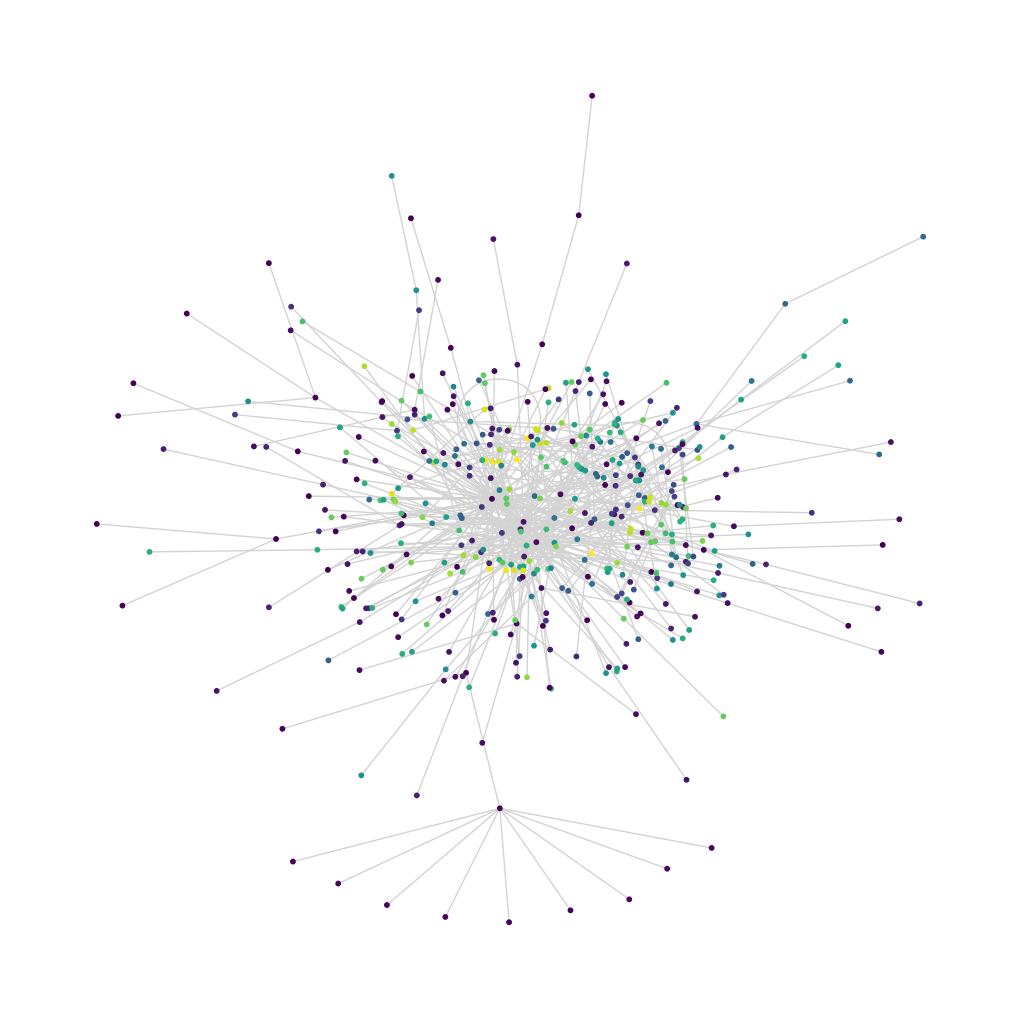

In [98]:
graficar_red(H)

## Algoritmo Girvan-Newman

In [99]:
N = comunidades(G,2)

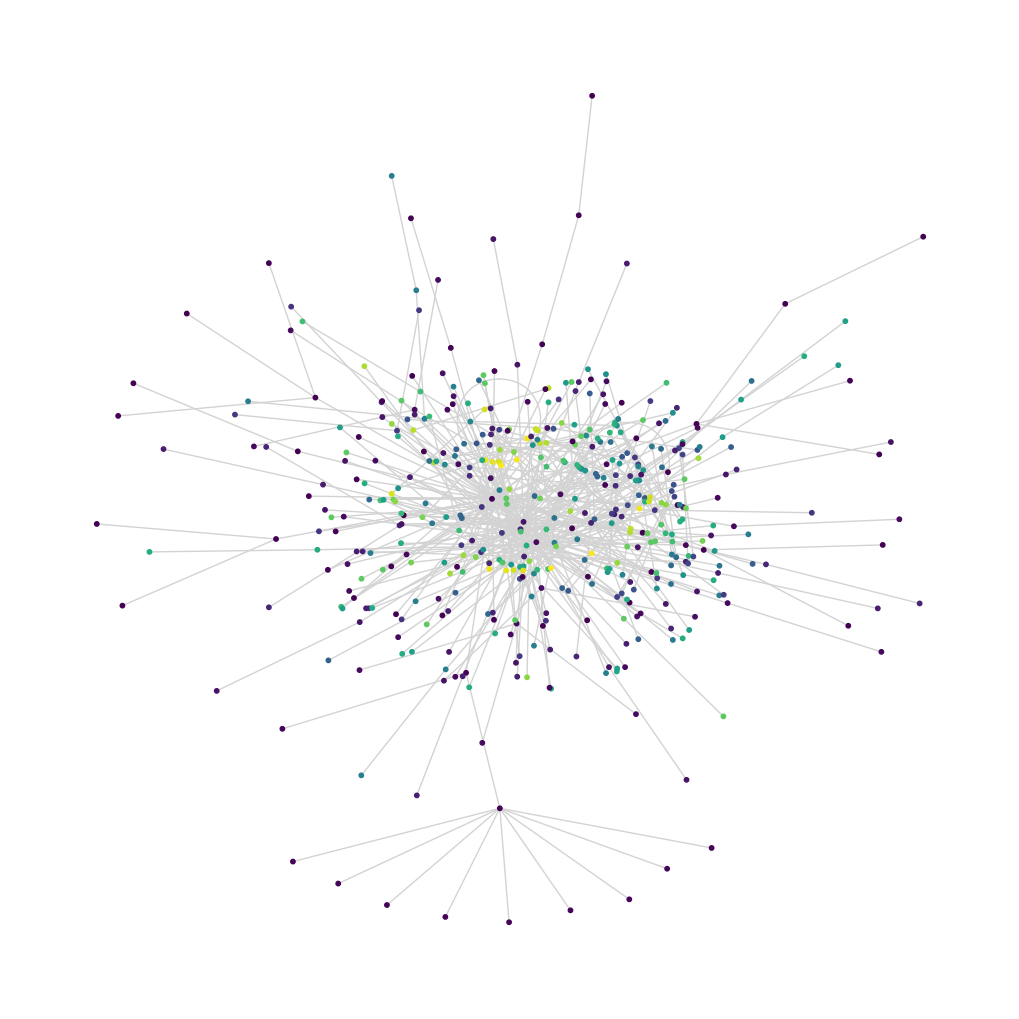

In [100]:
graficar_red(N)

## Algoritmo Infomap

In [105]:
M = comunidades(G,3)

AttributeError: module 'networkx' has no attribute 'copy'

In [ ]:
graficar_red(M)

## Algoritmo  Label propagation

In [60]:
Z = comunidades(G,4)

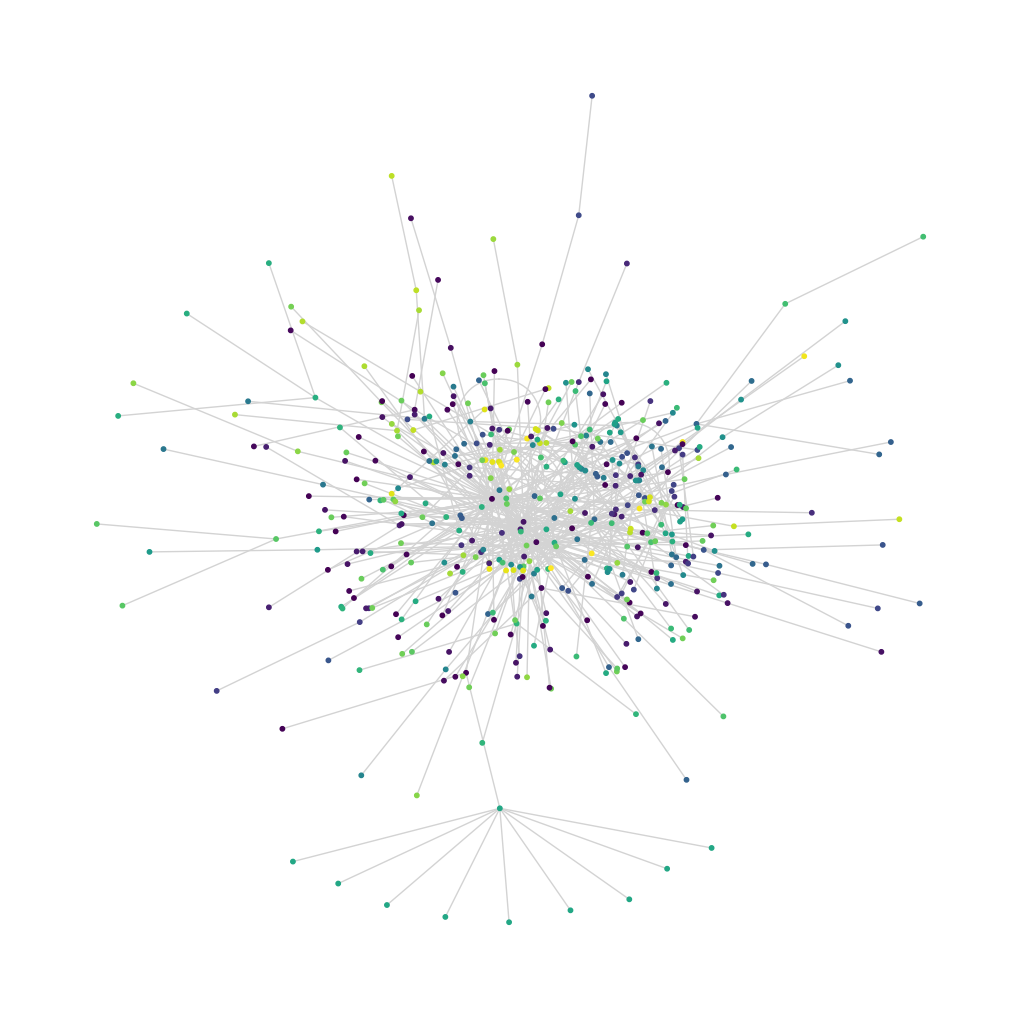

In [61]:
graficar_red(Z)

## Algoritmo Greedy Modularity

In [107]:
X = comunidades(G,5)

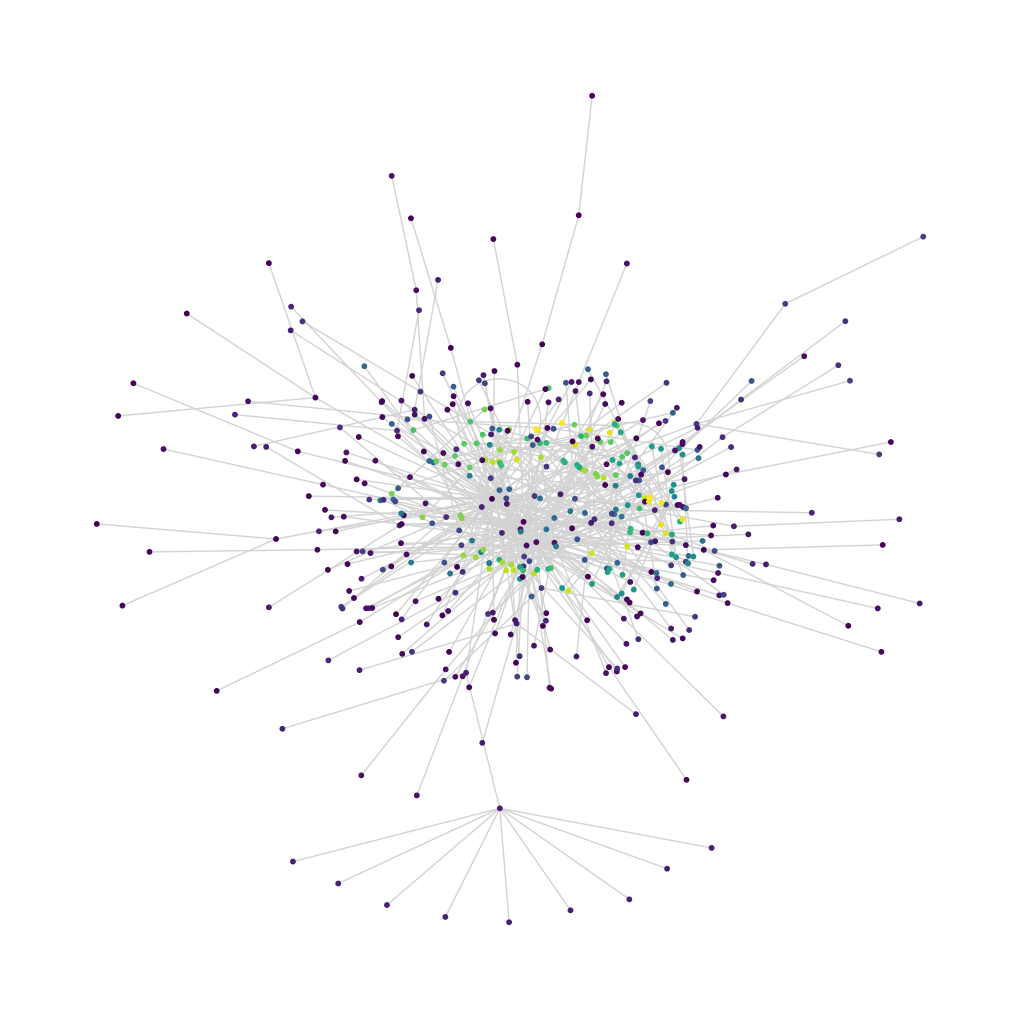

In [108]:
graficar_red(X)

## Algoritmo

## Algoritmo

## Algoritmo

## Algoritmo